In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def read_dataset(fname):
    # 指定索引
    data = pd.read_csv(fname, index_col=0) 
    data = data.reset_index()
    # 刪除不需要的欄位
    data.drop(['sg','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'], axis=1, inplace=True)
    # 將特徵處理成0或1
    data['rbc'] = (data['rbc'] == 'abnormal').astype('int')
    data['pc'] = (data['pc'] == 'abnormal').astype('int')
    data['pcc'] = (data['pcc'] == 'present').astype('int')
    data['ba'] = (data['ba'] == 'present').astype('int')
    data['htn'] = (data['htn'] == 'yes').astype('int')
    data['dm'] = (data['dm'] == 'yes').astype('int')
    data['cad'] = (data['cad'] == 'yes').astype('int')
    data['appet'] = (data['appet'] == 'poor').astype('int')
    data['pe'] = (data['pe'] == 'yes').astype('int')
    data['ane'] = (data['ane'] == 'yes').astype('int')
    data['class'] = (data['class'] == 'ckd').astype('int')
    # 處理血壓特徵
    labels = data['bp'].unique().tolist()
    data['bp'] = data['bp'].apply(lambda n: labels.index(n))
    # 處理遺缺值
    data = data.replace("?",0)
    return data

train = read_dataset('chronic_kidney_disease.csv')

In [3]:
train.head(20)

,age,bp,al,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48,0,1,0,0,0,0,1,1,0,0,0,0,1
1,7,1,4,0,0,0,0,0,0,0,0,0,0,1
2,62,0,2,0,0,0,0,0,1,0,1,0,1,1
3,48,2,4,0,1,1,0,1,0,0,1,1,1,1
4,51,0,2,0,0,0,0,0,0,0,0,0,0,1
5,60,3,3,0,0,0,0,1,1,0,0,1,0,1
6,68,2,0,0,0,0,0,0,0,0,0,0,0,1
7,24,4,2,0,1,0,0,0,1,0,0,1,0,1
8,52,5,3,0,1,1,0,1,1,0,0,0,1,1
9,53,3,2,1,1,1,0,1,1,0,1,0,1,1


In [4]:
from sklearn.model_selection import train_test_split

y = train['class'].values
X = train.drop(['class'], axis=1).values

#切分訓練與驗證資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape))

train dataset: (320, 13); test dataset: (80, 13)


In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))


train score: 0.984375; test score: 0.9375


best param: 9; best score: 0.9875


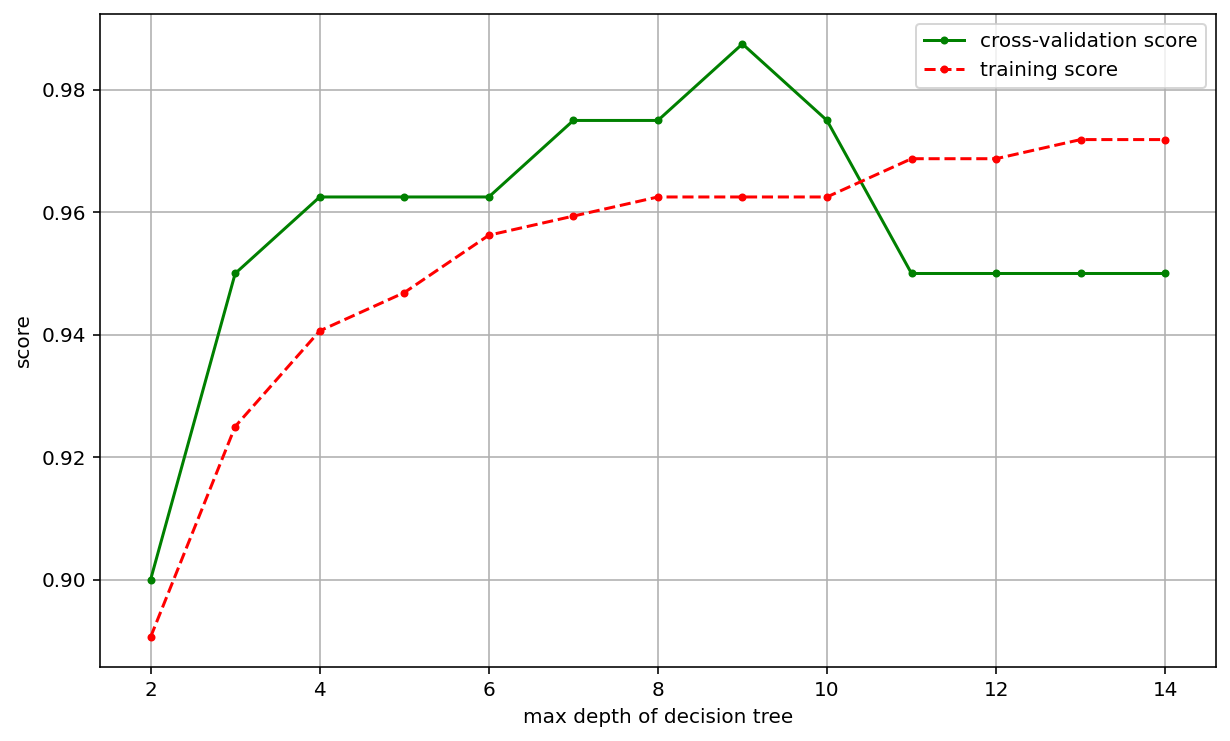

In [6]:
from sklearn.tree import DecisionTreeClassifier

#調整參數max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

#設定深度2~15
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

#找出驗證資料集分數最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
#列印最好的參數
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()


best param: 0.17346938775510204; best score: 0.9875


C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site

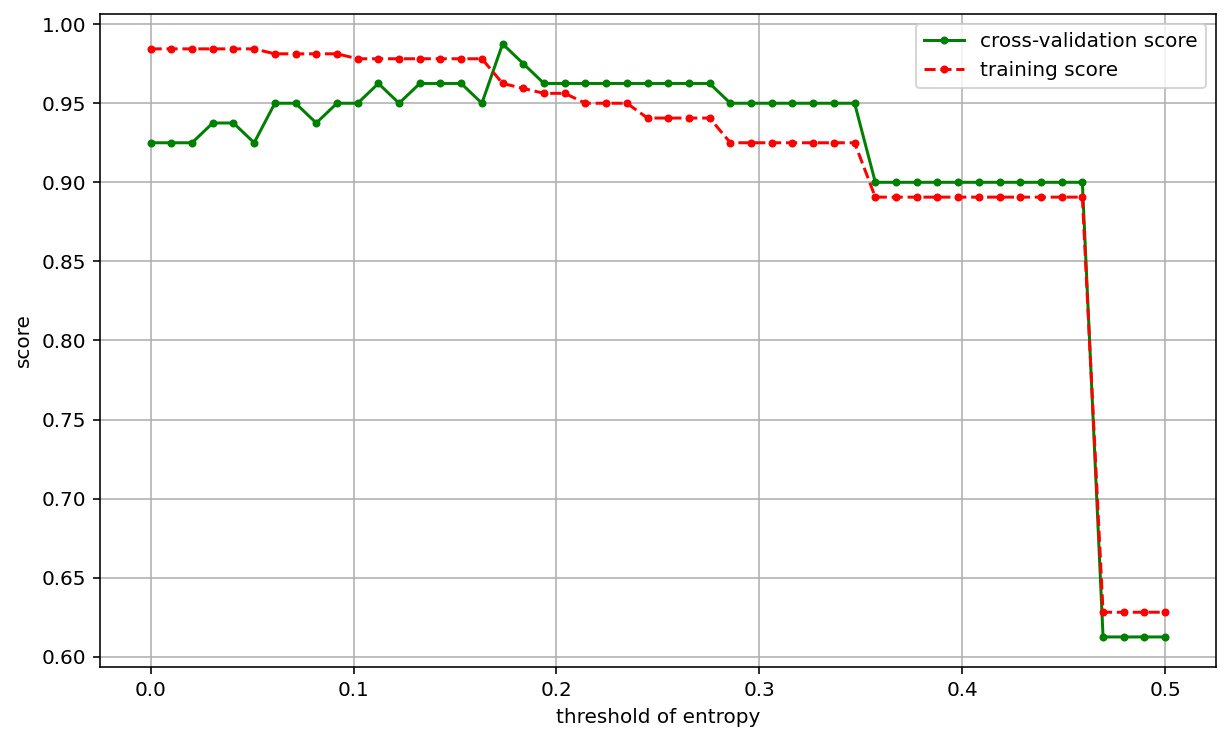

In [7]:
#利用基尼不純度
#設定閥值參數(min_impurity_split)，當information gain低於這個閥值時，則不進行分歧
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_split=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定閥值範圍
values = np.linspace(0, 0.5, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出分數最高的參數
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 畫圖
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [8]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site

best param: {'min_impurity_split': 0.13265306122448978}
best score: 0.9474747474747475


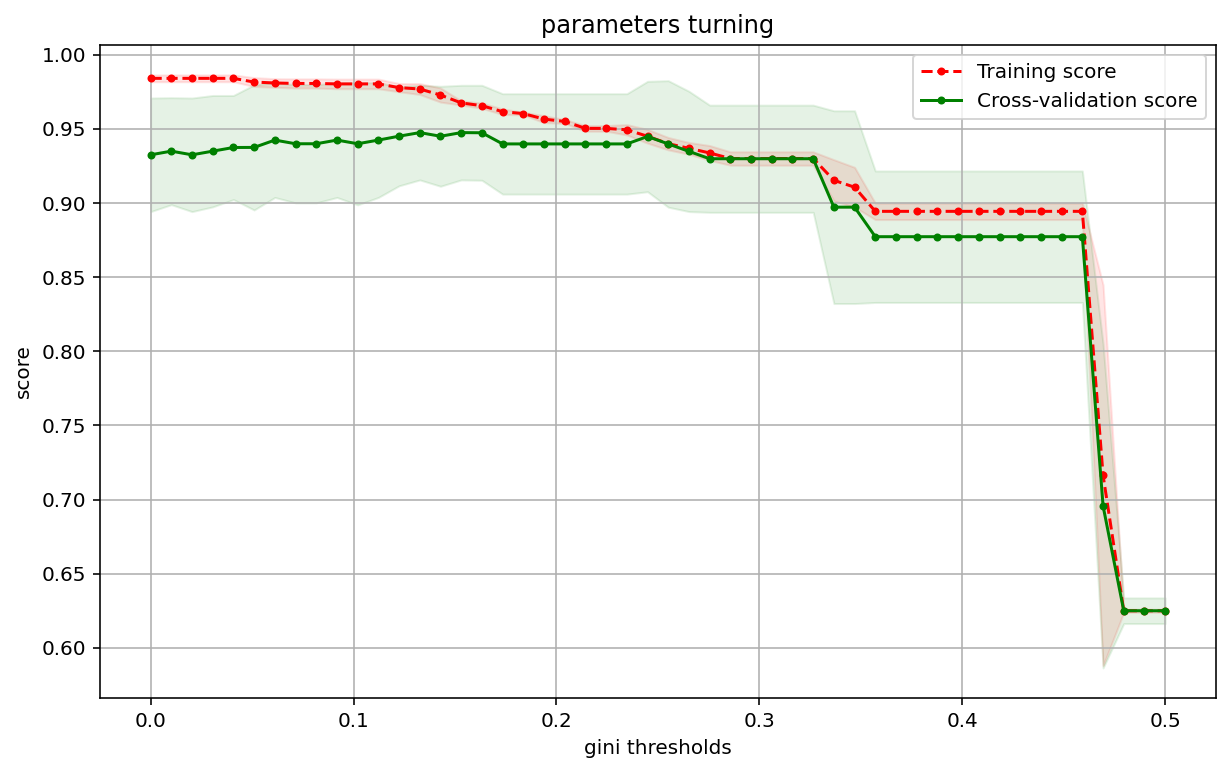

In [9]:
#透過GridSearchCV進行
#優點: 1. 內建交驗驗證，讓資料樣本穩定 2. 可以同時設定多個參數
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_split': thresholds}

#每次計算時，都把資料切成5份，拿其中一份做為交叉驗證資料集，其他做為訓練資料集
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=9, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [10]:
#進行多個參數設定
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.5, 50)

#ID3
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_split': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_split': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=9)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning
C:\Users\user\anaconda3\envs\AI\lib\site

best param: {'max_depth': 9}
best score: 0.9574074074074073


## 生成決策數圖形

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn import tree

with open("Decision_Tree/chronic_kidney_disease.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 0.9625; test score: 0.95


# 開啟 chronic_kidney_disease.dot檔案，將內文複製貼上
# https://dreampuf.github.io/GraphvizOnline/
